## Curso
APRENDIZAJE AUTOMÁTICO: Teoría y aplicaciones - INF648
## Integrantes
- DURAN TINOCO, RICHARD HERNAN, Codigo:	20032283
- ALVAREZ ROJAS, DOMINICK PATRICIA, Codigo:	20150169
- POVIS RODRIGUEZ, ANGEL LUIS, Codigo:		20255349

## Proyecto:
Productivity Prediction of Garment Employees Data Set


In [638]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# **1. LECTURA DEL DATASET**

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# obtención del dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)

# dividimos entre la data X y el target y
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
X['actual_productivity'] = y

# visualizamos la metadata
print(productivity_prediction_of_garment_employees.metadata)

# visualizamos las variables
print(productivity_prediction_of_garment_employees.variables)


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

# **2. TRATAMIENTO INICIAL DE LOS DATOS**

##**2.1 Eliminación de outliers para la columna incentivo**

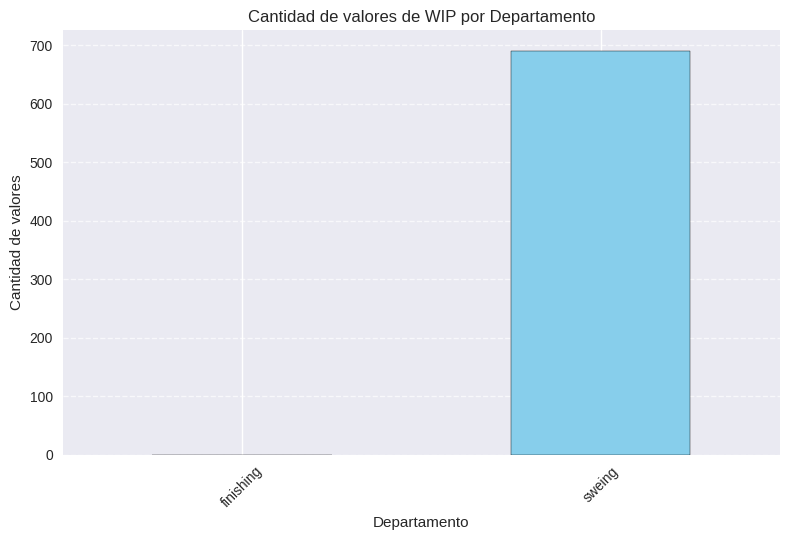

In [640]:
# Contar la cantidad de valores de 'wip' por 'department'
wip_counts = X.groupby('department')['wip'].count()

# Graficar los resultados
wip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de valores de WIP por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de valores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [641]:
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


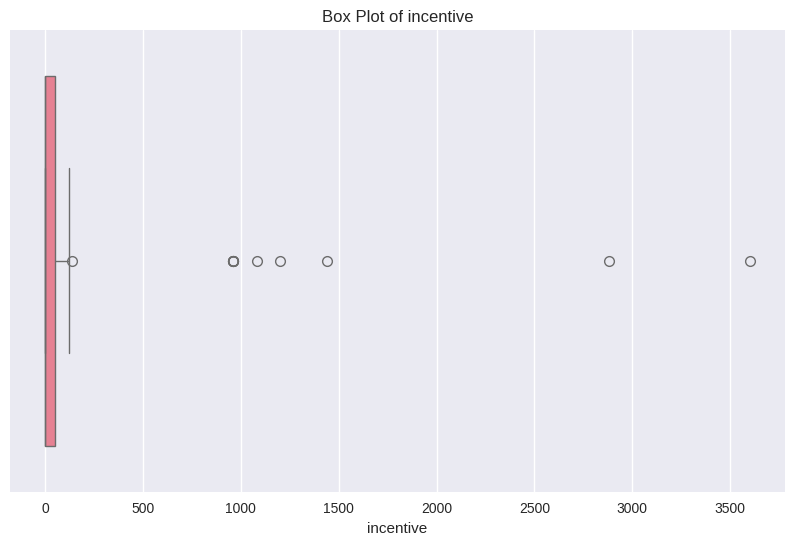

In [642]:
plot_column_details(X, 'incentive')

In [643]:
def count_incentive_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['incentive'] >= threshold).sum()
    print(f"Cantidad de outliers en 'incentive' >= {threshold}: {count}")

import pandas as pd

def remove_incentive_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['incentive'] < threshold].copy()
    return X_filtered

count_incentive_outliers(X, 300)
X = remove_incentive_outliers(X, 300)

Cantidad de outliers en 'incentive' >= 300: 10


##**2.2 Eliminación de outliers para la columna 'over_time'**

In [644]:
def remove_over_time_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['over_time'] < threshold].copy()
    return X_filtered

def count_over_time_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['over_time'] >= threshold).sum()
    print(f"Cantidad de outliers en 'over_time' >= {threshold}: {count}")

threshold_value = 15000

count_over_time_outliers(X, threshold_value)
X_clean = remove_over_time_outliers(X, threshold_value)

Cantidad de outliers en 'over_time' >= 15000: 4


##**2.3 Eliminación de outliers para la columna 'idle_time'**

In [645]:
def remove_idle_time_outliers(X: pd.DataFrame, threshold: float) -> pd.DataFrame:
    X_filtered = X[X['idle_time'] < threshold].copy()
    return X_filtered

def count_idle_time_outliers(X: pd.DataFrame, threshold: float) -> None:
    count = (X['idle_time'] >= threshold).sum()
    print(f"Cantidad de outliers en 'idle_time' >= {threshold}: {count}")


threshold_value = 20

count_idle_time_outliers(X, threshold_value)
X_clean = remove_idle_time_outliers(X, threshold_value)

Cantidad de outliers en 'idle_time' >= 20: 4


##**2.4 Validación de datos con la columna 'wip' en nulo**

In [646]:
set(X['quarter'])

{'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'}

In [647]:
X[X['wip'].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# **3. ANÁLISIS DEL TARGET (PRODUCTIVIDAD)**

## 3.1 Productivy over time

<Axes: title={'center': ' Productivity Over Time'}, xlabel='Date', ylabel='Productivity'>

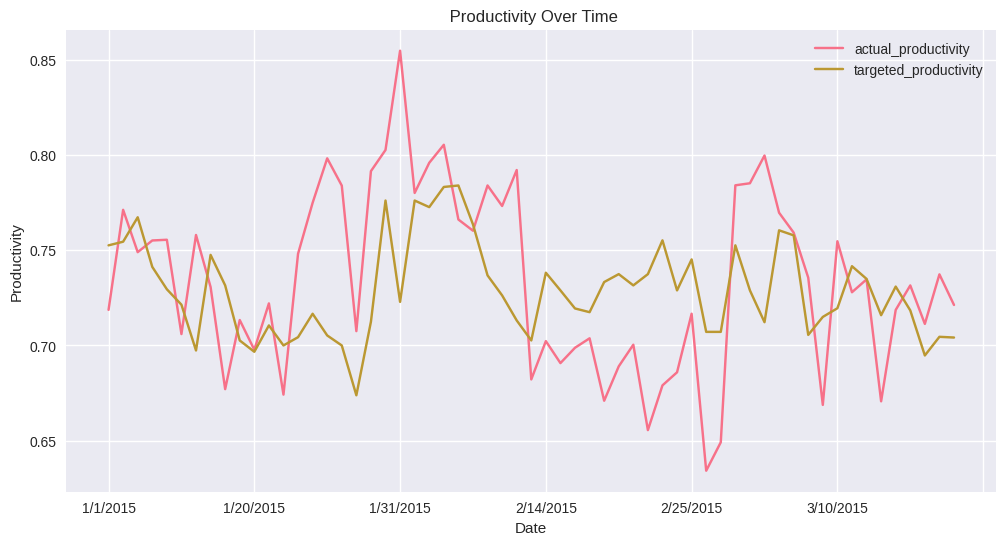

In [648]:
X.groupby(['date']).agg({'actual_productivity': 'mean','targeted_productivity': 'mean'}).plot(
    title=' Productivity Over Time',
    xlabel='Date',
    ylabel='Productivity',
    figsize=(12, 6))

##3.2 Distribución de productividad (target del dataset)

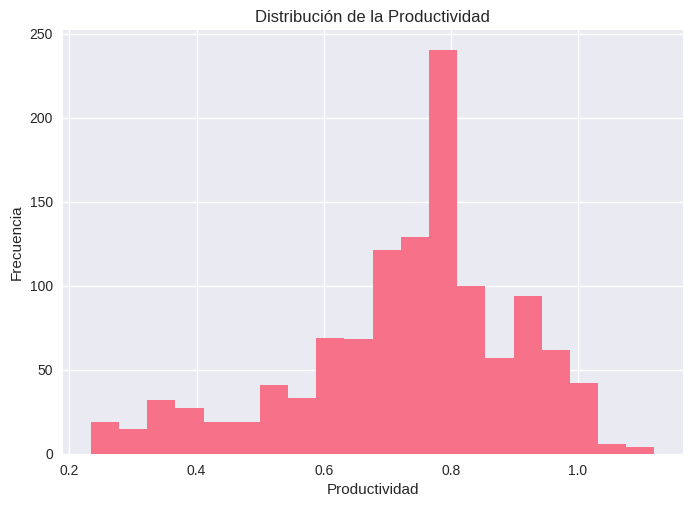

In [649]:
# Distribución de 'actual_productivity' (para definir clases)
plt.hist(y['actual_productivity'], bins=20)
plt.xlabel('Productividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Productividad')
plt.show()

# **4. ANÁLISIS DISTRIBUCIÓN COLUMNAS DEL DATASET (X)**

In [650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se emplea seaborn para mejor visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def plot_all_columns(df):
    # Obtenemos la cantidad de columnas
    n_cols = len(df.columns)

    # Se calcula el número de filas necesarias para la caCalculate number of rows needed for subplot grid
    n_rows = (n_cols + 2) // 3

    fig = plt.figure(figsize=(15, 5*n_rows))

    for idx, col in enumerate(df.columns, 1):
        plt.subplot(n_rows, 3, idx)

        # Visualizamos para columnas numericas
        if pd.api.types.is_numeric_dtype(df[col]):
            # Histograma
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f'Distribution of {col}')

        # Visualizamos para columnas categoricas
        else:
            # Grafico de barras
            value_counts = df[col].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45)
            plt.title(f'Count of {col}')

    plt.tight_layout()
    plt.show()

# Gráfico de visualización de correlación
def plot_correlations(df):
    # Se selecciona las columnas numéricas
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Gráfico de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.show()

# Función para graficar cada columna en particular:
def plot_column_details(df, column_name):
    plt.figure(figsize=(10, 6))

    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Gráfico Box plot para datos numéricos
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of {column_name}')
    else:
        # Gráfico circular para datos categóricos
        plt.pie(df[column_name].value_counts(),
                labels=df[column_name].value_counts().index,
                autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name}')

    plt.show()

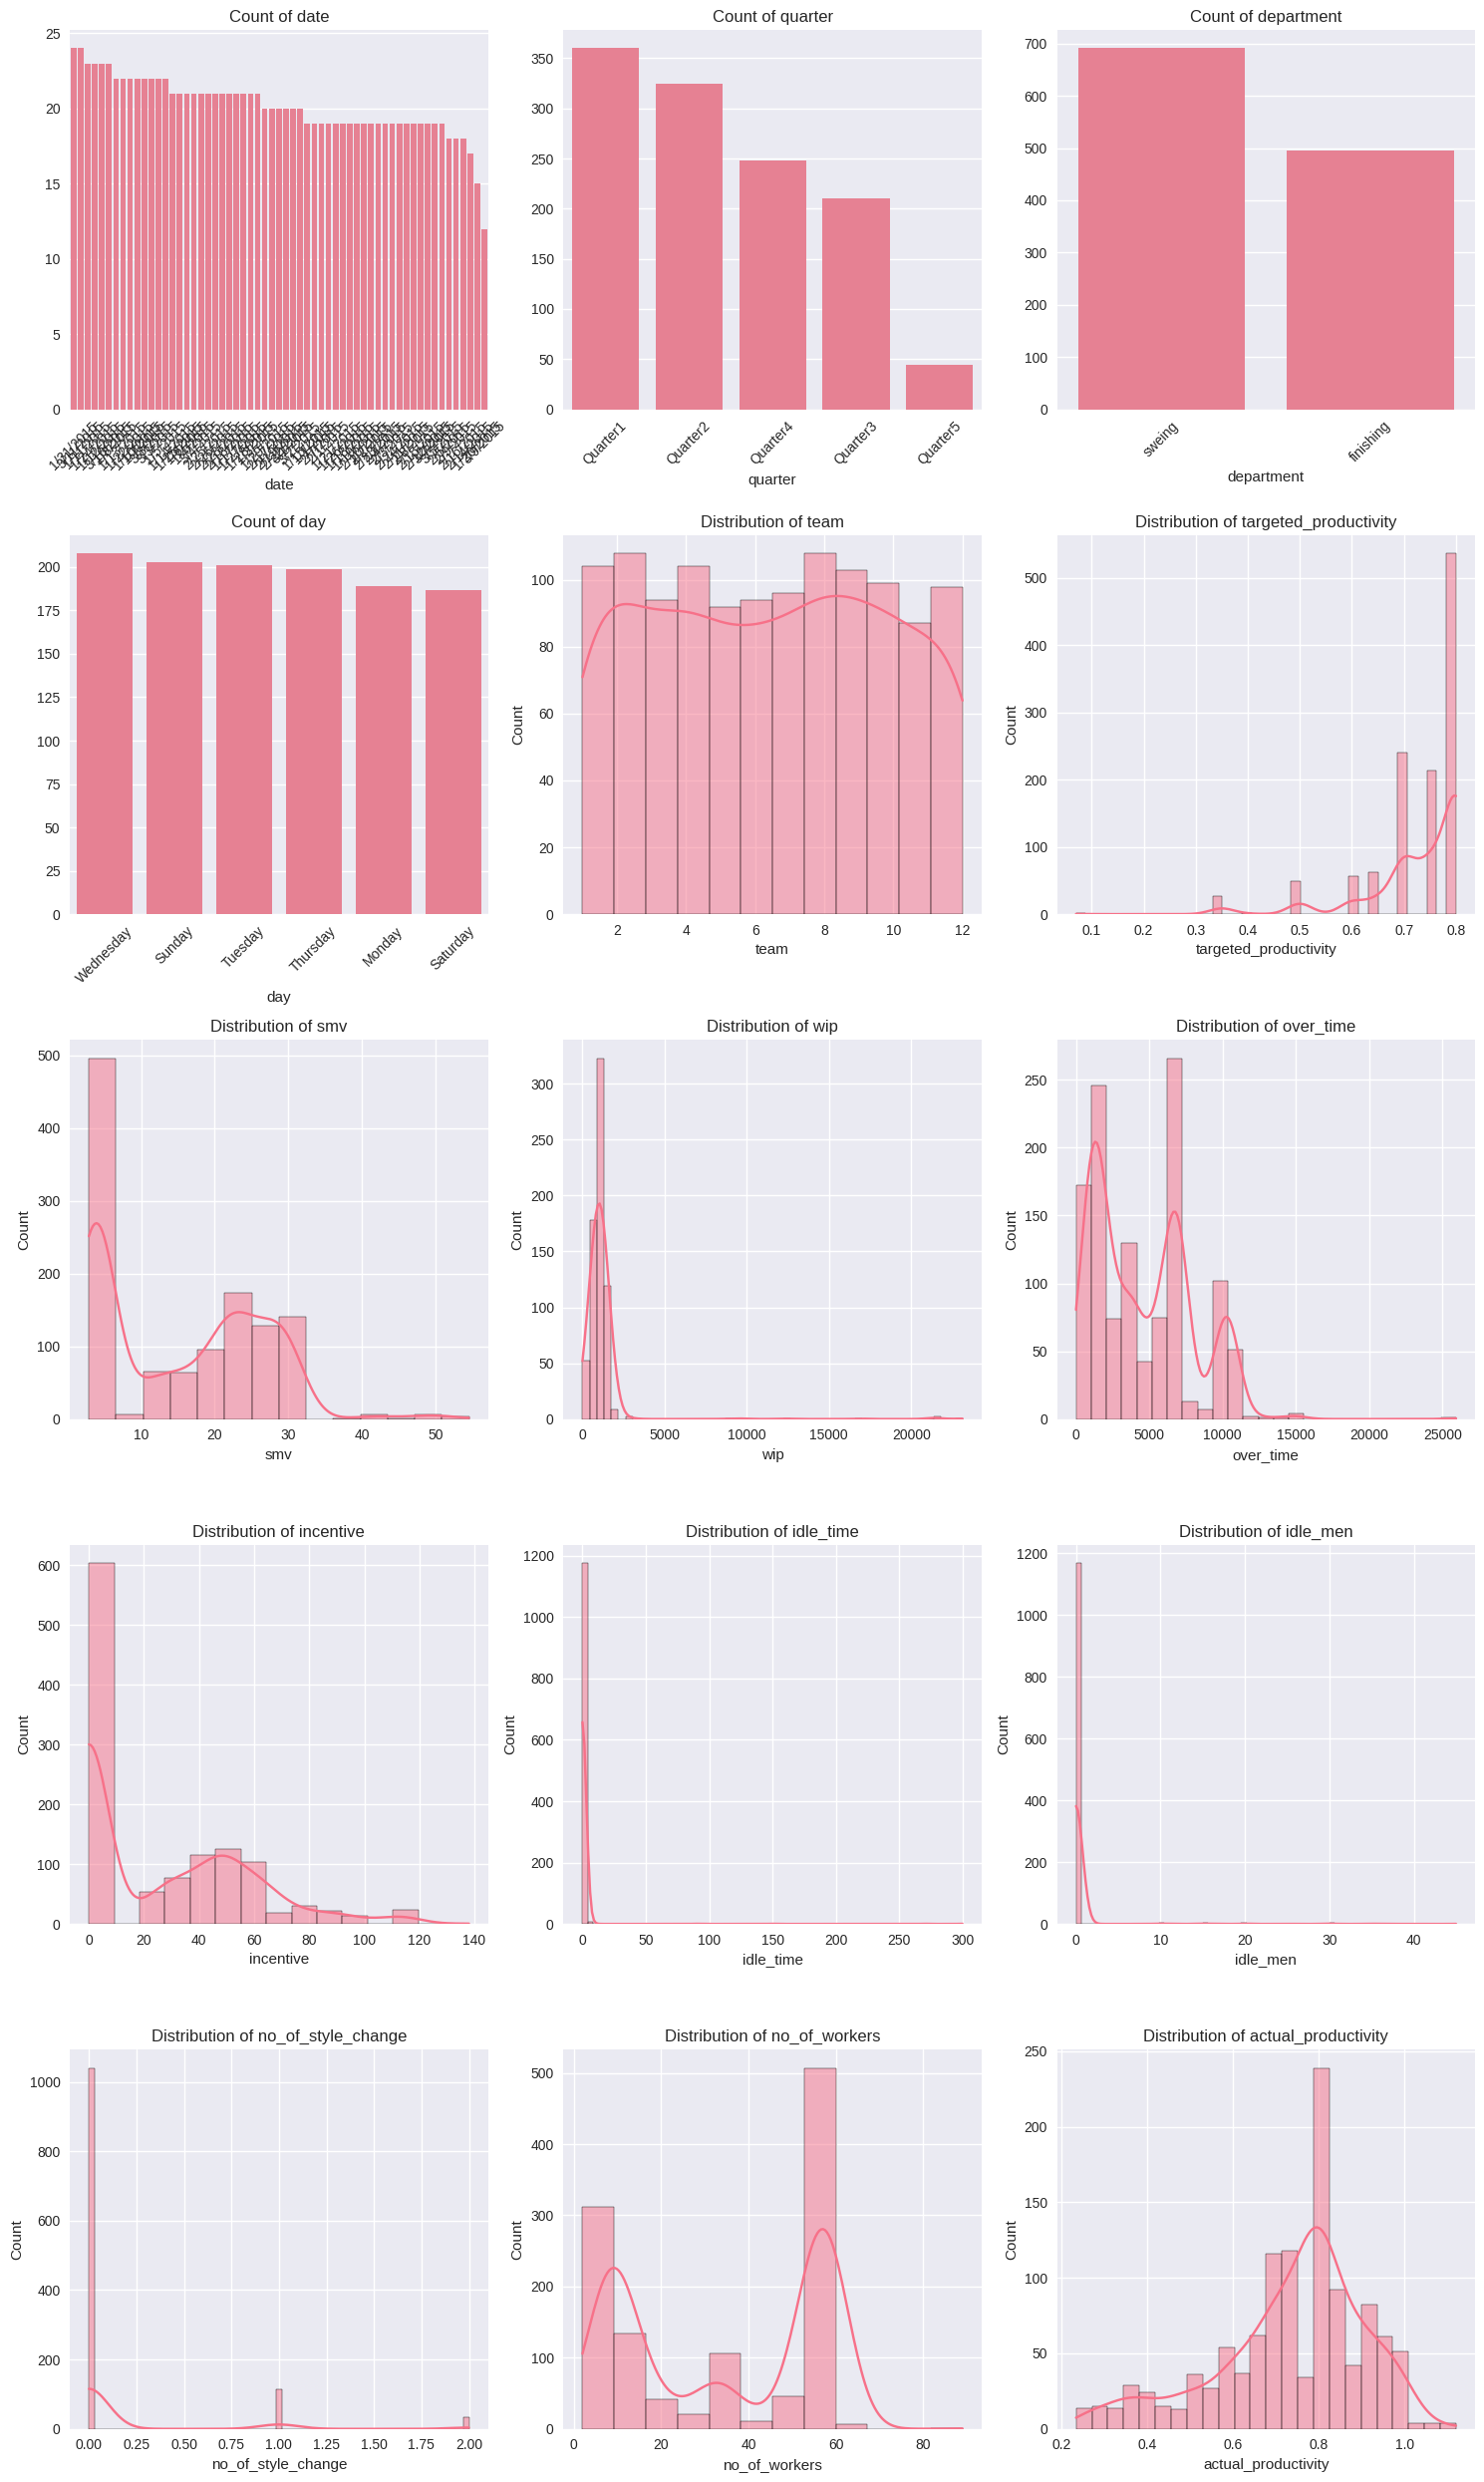

In [651]:
plot_all_columns(X)

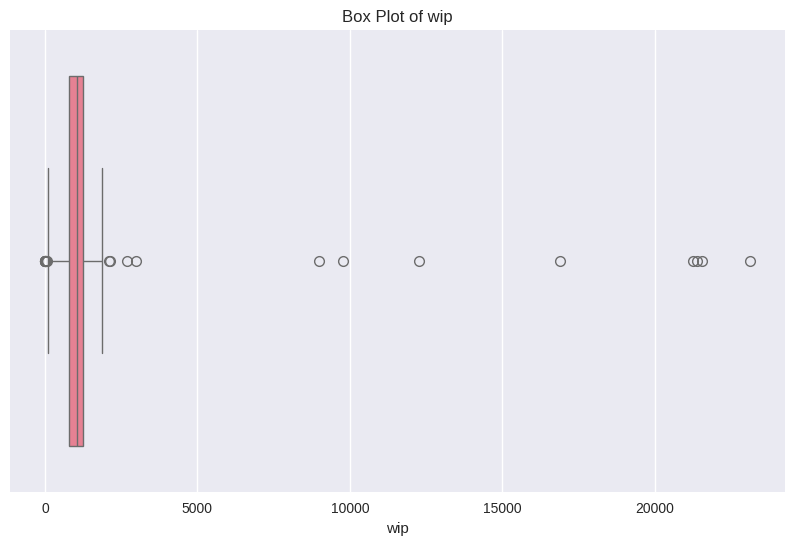

In [652]:
plot_column_details(X, 'wip')

In [653]:
# 2. Valores faltantes en 'wip'
print("Valores faltantes en 'wip':", X['wip'].isnull().sum())

Valores faltantes en 'wip': 496


In [654]:
# 3. Cardinalidad de variables categóricas
print("\nCategorías únicas:")
print("Departamento:", X['department'].unique())
print("Día de la semana:", X['day'].unique())
print("Trimestre:", X['quarter'].unique())
print("Equipos:", X['team'].nunique())


Categorías únicas:
Departamento: ['sweing' 'finishing']
Día de la semana: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Trimestre: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Equipos: 12


In [655]:
# 4. Rango de fechas
print("\nRango de fechas:")
print("Mínima:", X['date'].min())
print("Máxima:", X['date'].max())


Rango de fechas:
Mínima: 1/1/2015
Máxima: 3/9/2015


In [656]:
# Nota:
# La variable wip lleva valores NaN y numéricos.
# Se crea dos funciones para imputar los valores faltantes.
# La primera función imputa el wip con ceros
# La segunda función imputa el wio con la media

def show_NaN_values(X):
  print(np.isnan(X).sum())

def fill_wip_with_zero(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con 0."""
    X = X.copy()
    X['wip'] = X['wip'].fillna(0)
    return X

def fill_wip_with_mean(X: pd.DataFrame) -> pd.DataFrame:
    """Rellena NaN en la columna 'wip' con la media de esa columna."""
    X = X.copy()
    mean_value = X['wip'].mean()
    X['wip'] = X['wip'].fillna(mean_value)
    return X

def count_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> None:
    """
    Cuenta y muestra cuántas filas tienen 'wip' mayor o igual al umbral.

    Parámetros:
        X: pd.DataFrame - Dataset
        threshold: float - Valor umbral para considerar outliers
    """
    count = (X['wip'] >= threshold).sum()
    print(f"Cantidad de outliers en 'wip' >= {threshold}: {count}")

def remove_wip_outliers(X: pd.DataFrame, threshold: float = 5000) -> pd.DataFrame:
    """
    Elimina filas donde 'wip' es mayor o igual al umbral (default 5000).

    Parámetros:
        X: pd.DataFrame - Dataset original
        threshold: float - Valor umbral para considerar outliers

    Retorna:
        pd.DataFrame - Dataset filtrado sin outliers en 'wip'
    """
    X_filtered = X[X['wip'] < threshold].copy()
    return X_filtered

def remove_wip_greather_than_0(X: pd.DataFrame, threshold: float = 0) -> pd.DataFrame:
    X_filtered = X[X['wip'] == threshold].copy()
    return X_filtered

count_wip_outliers(X)
X = fill_wip_with_zero(X)
X = remove_wip_outliers(X)

#show_NaN_values(X)

Cantidad de outliers en 'wip' >= 5000: 8


In [657]:
# Se crean nuevos campos a partir del atributo "date"
X['day_of_year'] = pd.to_datetime(X['date']).dt.dayofyear
X['day_of_month'] = pd.to_datetime(X['date']).dt.day
X['month'] = pd.to_datetime(X['date']).dt.month
X.drop(columns=['date'], inplace=True)


In [658]:
# De acuerdo al análisis de los datos, se observa que los datos trimestrales son valores del 1 al 5
# Nota: cuatro trimestres forma un año.
#X.drop(columns=['quarter'], inplace=True)
quarter_map = {
    'Quarter1': 1,  # Primer trimestre
    'Quarter2': 2,  # Segundo trimestre
    'Quarter3': 3,  # Tercer trimestre
    'Quarter4': 4,  # Cuarto trimestre
    'Quarter5': 5  # Valor no válido
}
#X['quarter'] = X['quarter'].apply(lambda x: quarter_map.get(x, np.nan))
X.drop_duplicates(inplace=True)

In [659]:
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_year,day_of_month,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,70,11,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,70,11,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,70,11,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,70,11,3


In [660]:
department_map = {
    'finishing': 1,
    'sweing': 2,
}
#X['department'] = X['department'].apply(lambda x: department_map.get(x, np.nan))

In [661]:
department_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7,
}
#X['day'] =X['day'].apply(lambda x: department_map.get(x, np.nan))

In [662]:
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_year,day_of_month,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,70,11,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,70,11,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,70,11,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,70,11,3


In [663]:
# Definir columnas numéricas y categóricas
numeric_features = ['smv', 'over_time', 'incentive', 'idle_time', 'no_of_workers', 'day_of_year', 'day_of_month', 'month', 'wip', 'targeted_productivity']
categorical_features = ['department', 'day', 'quarter', 'team']

# Se escala variables numéricas
scaler = StandardScaler()

# Se codifica variables categóricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_features])
X.drop(columns=categorical_features, inplace=True)
X = pd.merge(X, pd.DataFrame(X_cat, columns=encoder.get_feature_names_out(categorical_features)), left_index=True, right_index=True)

# Combinar variables numéricas y categóricas
X[numeric_features] = scaler.fit_transform(X[numeric_features])




                            smv  over_time  incentive  idle_time  \
smv                    1.000000   0.667605   0.597671   0.057496   
over_time              0.667605   1.000000   0.531462   0.030882   
incentive              0.597671   0.531462   1.000000  -0.040167   
idle_time              0.057496   0.030882  -0.040167   1.000000   
no_of_workers          0.911310   0.728408   0.692686   0.058866   
day_of_year            0.013687  -0.243969  -0.085036   0.010387   
day_of_month           0.002983   0.028358   0.000466  -0.047094   
month                  0.010136  -0.233856  -0.078597   0.026364   
wip                    0.727173   0.621621   0.718828  -0.003058   
targeted_productivity -0.072943  -0.092425   0.213255  -0.056230   

                       no_of_workers  day_of_year  day_of_month     month  \
smv                         0.911310     0.013687      0.002983  0.010136   
over_time                   0.728408    -0.243969      0.028358 -0.233856   
incentive           

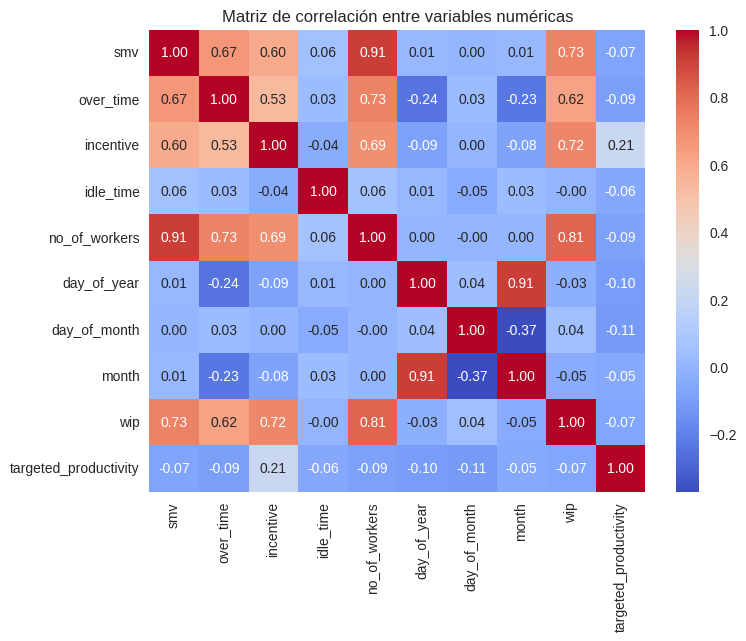

In [664]:
# Observamos la matriz de correlación

# Seleccionar solo las columnas numéricas del DataFrame
X_numeric = X[numeric_features]

# Calcular matriz de correlación
corr_matrix = X_numeric.corr()

# Mostrar matriz
print(corr_matrix)

# Opcional: visualizar con heatmap (mapa de calor)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

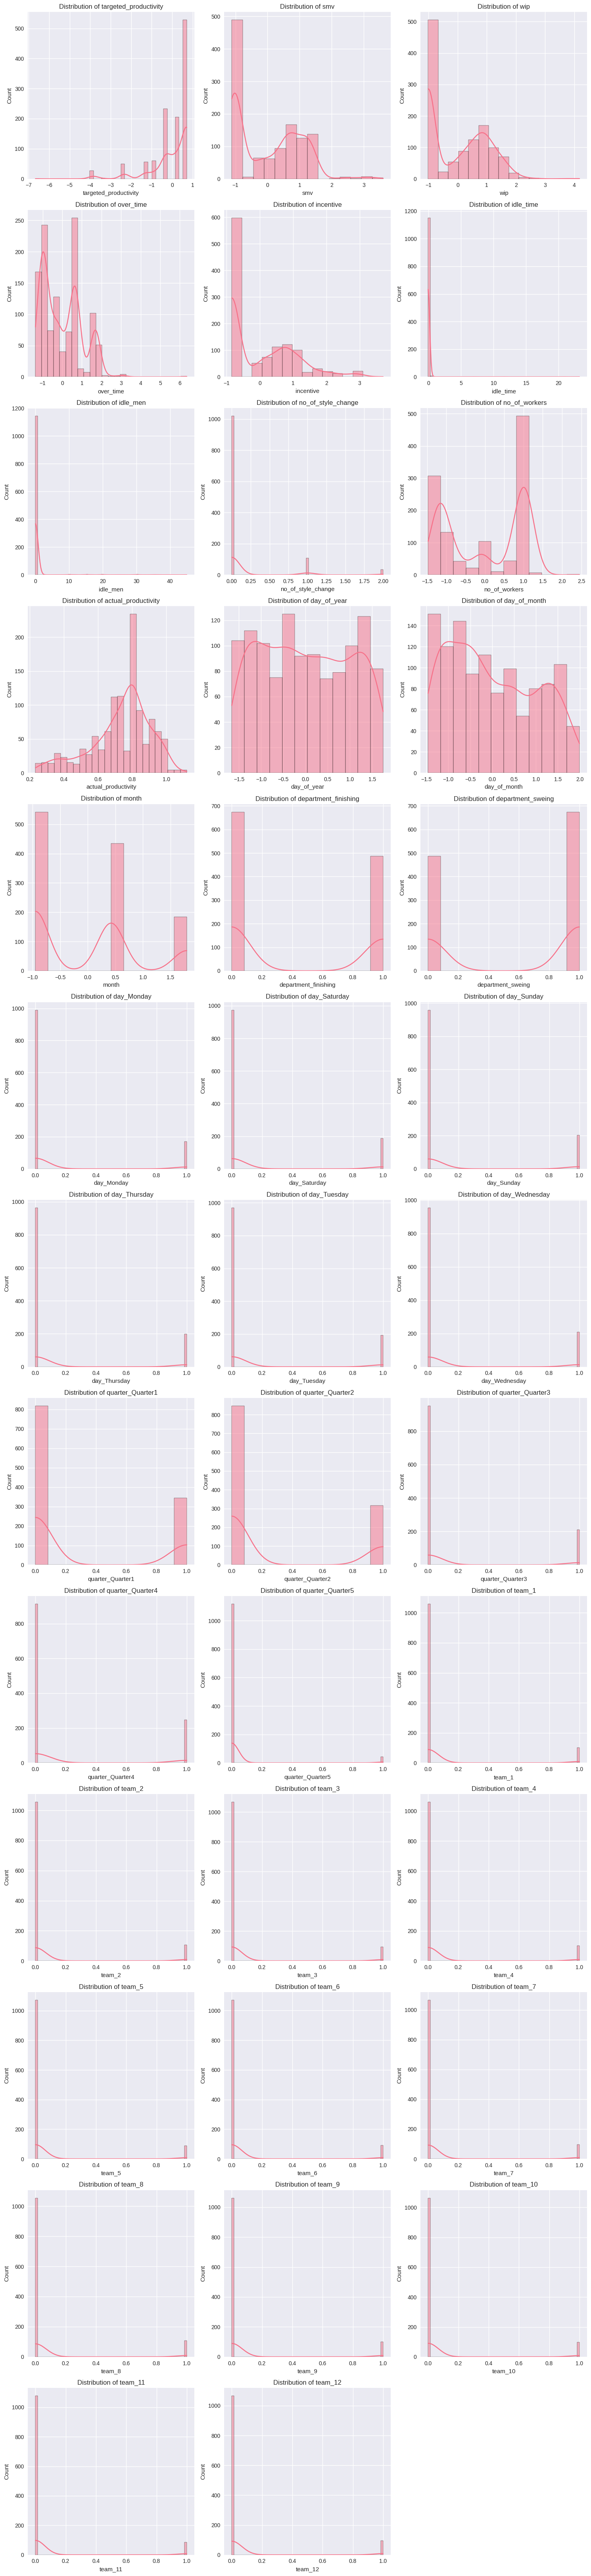

In [665]:
plot_all_columns(X)

### Solución 1: Clasificación Básica (Sin Técnicas Avanzadas)

In [666]:
# Eliminar columnas duplicadas
X.drop_duplicates(inplace=True)

### Clasificacion binaria

In [667]:
def show_count_values_target(serie):
  value_counts = serie.value_counts()

  # Plot as a bar chart
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.title('Value Counts of Target Column')
  plt.xlabel('Target Class')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [668]:
# Discretizar la variable objetivo
# Clasificación binaria: Baja (<0.6), Alta (>=0.6)
y_bin = pd.cut(X['actual_productivity'], bins=[0, 0.6, 1.5], labels=['Baja', 'Alta'])

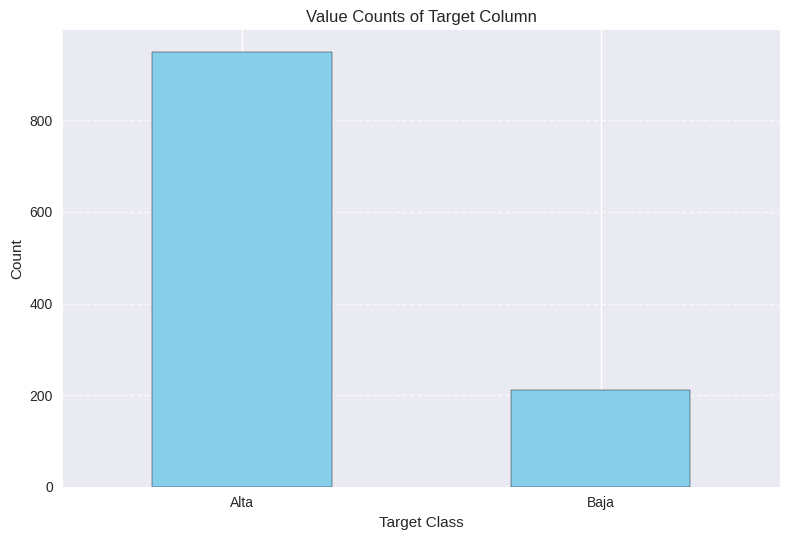

In [669]:
show_count_values_target(y_bin)

### Clasificacion ternaria

In [670]:
# Clasificación multiclase: Baja (<0.85), Media (0.85-0.95), Alta (>=0.95)
y_multi = pd.cut(X['actual_productivity'], bins=[0, 0.85, 0.95, 1.5], labels=['Bajo', 'Moderado', 'Normal'])

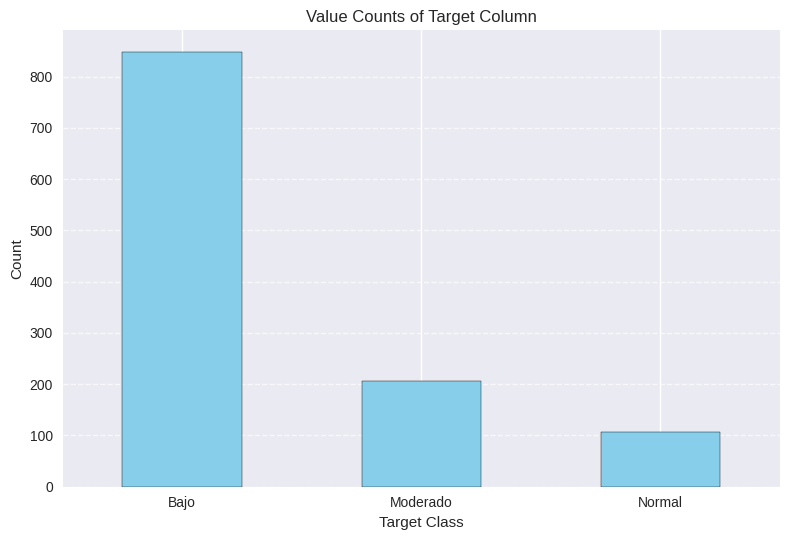

In [671]:
show_count_values_target(y_multi)

### Procesamiento Manual de Variables

In [672]:
X.drop(columns=['actual_productivity'], inplace=True)

# Entrenar Modelos (Ejemplo para Clasificación Ternaria)

### Dividir datos para clasificacion ternaria

In [673]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)

# Solucion 1: Random Forest

In [674]:
X

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_of_year,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0.715371,1.010326,0.914612,0.739372,2.388772,-0.05836,0,0,1.097949,-1.661953,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.209742,-1.018633,-1.015446,-1.085923,-0.843741,-0.05836,0,0,-1.202621,-1.661953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.715371,-0.336530,0.670742,-0.280646,0.805500,-0.05836,0,0,-0.187664,-1.661953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.715371,-0.336530,0.670742,-0.280646,0.805500,-0.05836,0,0,-0.187664,-1.661953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.715371,0.986585,1.022612,-0.799603,0.805500,-0.05836,0,0,0.962622,-1.661953,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0.715371,-1.113597,-1.015446,-0.656442,-0.843741,-0.05836,0,0,-1.112403,1.745186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1175,0.209742,-1.022285,-1.015446,-0.799603,-0.843741,-0.05836,0,0,-1.202621,1.745186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1176,0.209742,-1.018633,-1.015446,-0.799603,-0.843741,-0.05836,0,0,-1.202621,1.745186,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1177,0.209742,-1.018633,-1.015446,-0.799603,-0.843741,-0.05836,0,0,-1.202621,1.745186,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [675]:
from sklearn.metrics import roc_auc_score, roc_curve

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Ternaria):", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

y_probs = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f"AUC: {auc:.3f}")

from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))

Precisión (Ternaria): 0.8538681948424068
Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Bajo       0.87      0.96      0.91       253
    Moderado       0.79      0.61      0.69        61
      Normal       0.82      0.51      0.63        35

    accuracy                           0.85       349
   macro avg       0.82      0.69      0.74       349
weighted avg       0.85      0.85      0.84       349

Matriz de Confusión:
 [[243   7   3]
 [ 23  37   1]
 [ 14   3  18]]
AUC: 0.922
F1-score promedio: 0.8447683078162672


                  feature  importance
4               incentive    0.145551
1                     smv    0.092417
8           no_of_workers    0.090702
9             day_of_year    0.086553
3               over_time    0.084461
10           day_of_month    0.076307
0   targeted_productivity    0.057513
2                     wip    0.047439
25                 team_1    0.019739
21       quarter_Quarter2    0.017779
11                  month    0.017674
33                 team_9    0.016879
17           day_Thursday    0.014466
26                 team_2    0.014245
16             day_Sunday    0.013254
19          day_Wednesday    0.012763
13      department_sweing    0.012600
32                 team_8    0.012423
31                 team_7    0.011988
28                 team_4    0.011955
20       quarter_Quarter1    0.011601
24       quarter_Quarter5    0.011484
15           day_Saturday    0.011307
22       quarter_Quarter3    0.011297
14             day_Monday    0.010907
18          

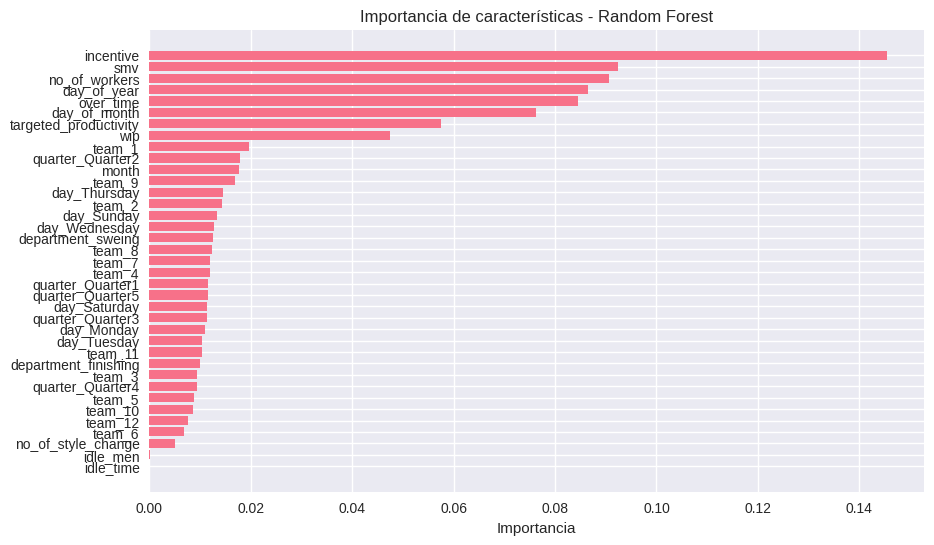

In [676]:
# Obtener importancia de características
importances = model.feature_importances_

# Crear dataframe para visualizar junto a nombres de columnas
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()  # para que la más importante aparezca arriba
plt.xlabel('Importancia')
plt.title('Importancia de características - Random Forest')
plt.show()

## Detalle de arbol de decision

Accuracy: 0.7822349570200573


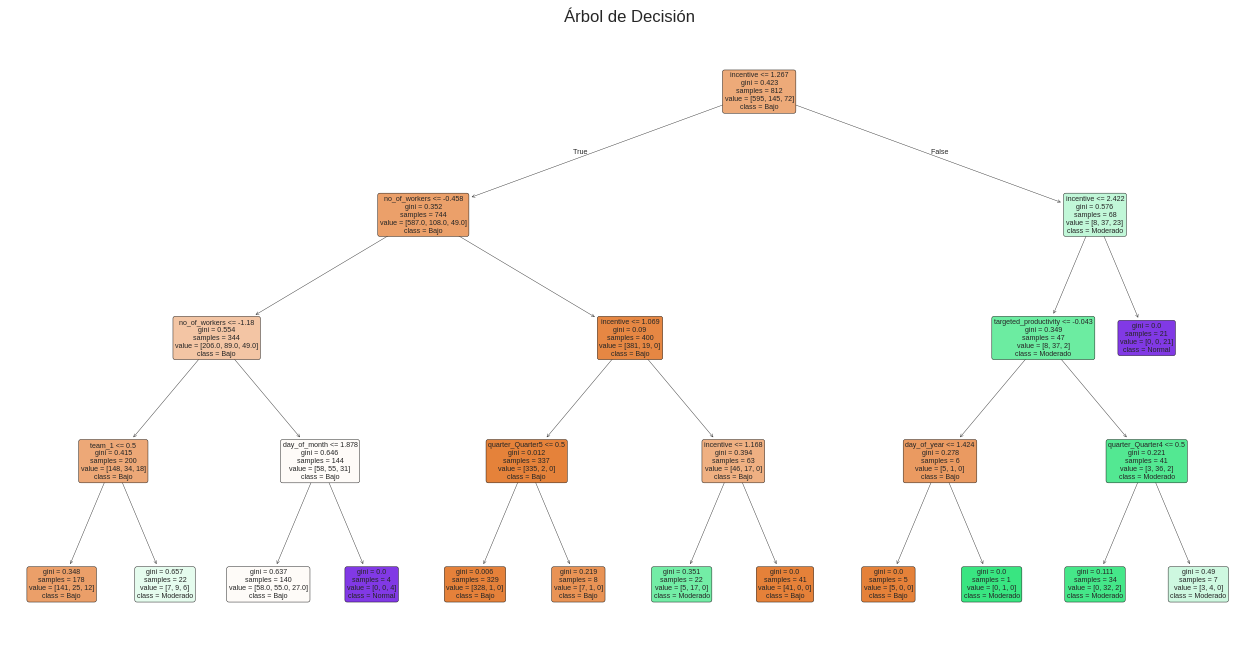

In [677]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()


Se identifico en el arbol de decisión que el incentivo es el atributo predominante para la clasificación del modelo

## Solucion 2: KNN

In [698]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7936962750716332


## Solución 3: Máquina de Vectores de Soporte (SVM)

In [679]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for i in range(1, 11):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svm = SVC(kernel=kernel, C=i, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        print(f"Exactitud con kernel={kernel} y C={i}: {accuracy_score(y_test, y_pred)}")


Exactitud con kernel=linear y C=1: 0.7478510028653295
Exactitud con kernel=poly y C=1: 0.7363896848137536
Exactitud con kernel=rbf y C=1: 0.7822349570200573
Exactitud con kernel=sigmoid y C=1: 0.7249283667621776
Exactitud con kernel=linear y C=2: 0.7593123209169055
Exactitud con kernel=poly y C=2: 0.7765042979942693
Exactitud con kernel=rbf y C=2: 0.7965616045845272
Exactitud con kernel=sigmoid y C=2: 0.7220630372492837
Exactitud con kernel=linear y C=3: 0.7593123209169055
Exactitud con kernel=poly y C=3: 0.7822349570200573
Exactitud con kernel=rbf y C=3: 0.7994269340974212
Exactitud con kernel=sigmoid y C=3: 0.7249283667621776
Exactitud con kernel=linear y C=4: 0.7679083094555874
Exactitud con kernel=poly y C=4: 0.8022922636103151
Exactitud con kernel=rbf y C=4: 0.7965616045845272
Exactitud con kernel=sigmoid y C=4: 0.7220630372492837
Exactitud con kernel=linear y C=5: 0.7707736389684814
Exactitud con kernel=poly y C=5: 0.8051575931232091
Exactitud con kernel=rbf y C=5: 0.799426934097

Mejor resultado SVM: Exactitud con kernel=poly y C=8: 0.8137535816618912

## Solución 4:  Regresion logistica

In [680]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.7593123209169055


## Solución 2: Clasificación Avanzada (Con Balanceo y Optimización)

### Balanceo de Clases (SMOTE)

In [681]:
from imblearn.over_sampling import SMOTE

# Dividir datos originales (sin balancear)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Aplicar SMOTE solo en entrenamiento (ejemplo para clasificación multiclase)
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

In [682]:
def show_count_values_target_2(serie_1, serie_2):
  value_counts_1 = serie_1.value_counts()
  value_counts_2 = serie_2.value_counts()
  # Plot as a bar chart
  #value_counts_1.plot(kind='bar', color='skyblue', edgecolor='black')
  #value_counts_2.plot(kind='bar', color='red', edgecolor='black')
    # Combine into a DataFrame for grouped bar chart
  df_counts = pd.DataFrame({
      'Original': value_counts_1,
      'Balanced': value_counts_2
  }).fillna(0).astype(int)

  # Plot as grouped bar chart
  ax = df_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', figsize=(8, 5))

  # Annotate each bar with its height (value)
  for container in ax.containers:
      for bar in container:
          height = bar.get_height()
          ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height),
                      xytext=(0, 3), textcoords='offset points',
                      ha='center', va='bottom', fontsize=9)

  # Customize plot
  plt.title('Cantidad de columna objetivo')
  plt.xlabel('Etiqueta')
  plt.ylabel('Cantidad')
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Move legend to bottom
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)

  plt.tight_layout()
  plt.show()

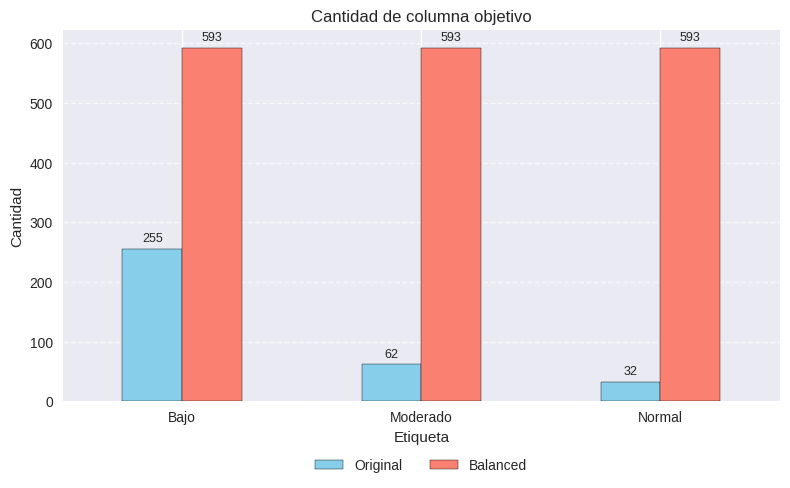

In [683]:
show_count_values_target_2(y_test,y_bal)


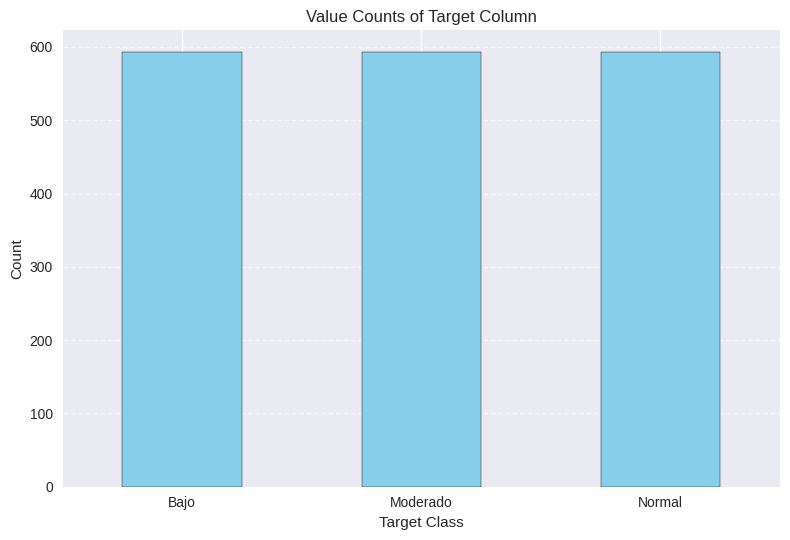

In [684]:
show_count_values_target(y_bal)

##Solución 1. Random Forest (balanceado)

In [685]:
# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_bal, y_bal)


# Evaluar
y_pred = model.predict(X_test)
print("Precisión (Ternaria):", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = model.predict(X_test)

# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


# Validación cruzada
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


y_probs = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f"AUC: {auc:.3f}")

Precisión (Ternaria): 0.839541547277937
Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Bajo       0.92      0.93      0.93       255
    Moderado       0.62      0.56      0.59        62
      Normal       0.58      0.66      0.62        32

    accuracy                           0.84       349
   macro avg       0.71      0.72      0.71       349
weighted avg       0.84      0.84      0.84       349

Matriz de Confusión:
 [[237  12   6]
 [ 18  35   9]
 [  2   9  21]]
F1-score promedio: 0.814021991996893
AUC: 0.924


                  feature  importance
4               incentive    0.127444
1                     smv    0.116823
8           no_of_workers    0.081852
9             day_of_year    0.080147
3               over_time    0.073914
0   targeted_productivity    0.066129
10           day_of_month    0.048000
2                     wip    0.045998
26                 team_2    0.019672
11                  month    0.019387
21       quarter_Quarter2    0.018921
36                team_12    0.018686
16             day_Sunday    0.016915
25                 team_1    0.016554
17           day_Thursday    0.016550
22       quarter_Quarter3    0.015467
12   department_finishing    0.015222
28                 team_4    0.014400
27                 team_3    0.013713
31                 team_7    0.013319
14             day_Monday    0.012988
13      department_sweing    0.012790
15           day_Saturday    0.012730
33                 team_9    0.012692
18            day_Tuesday    0.011461
19          

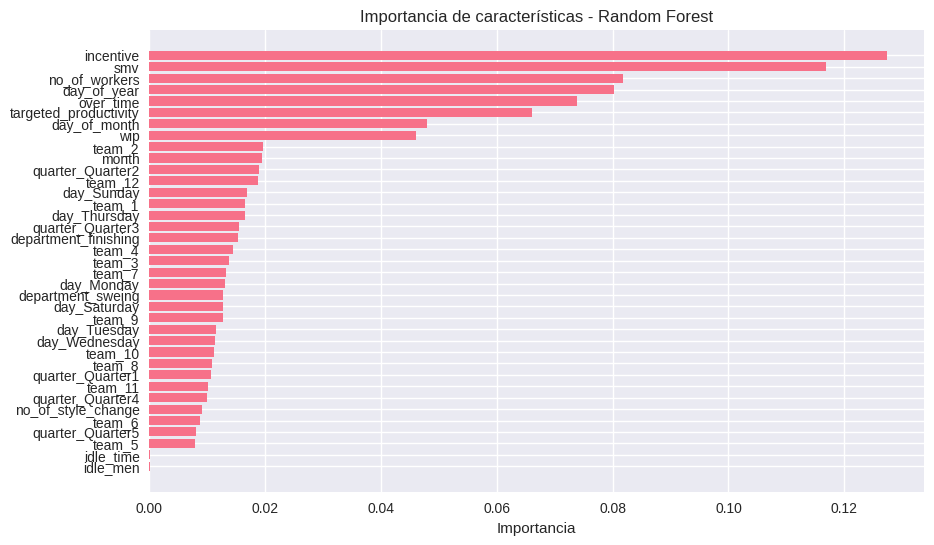

In [686]:
# Obtener importancia de características
importances = model.feature_importances_

# Crear dataframe para visualizar junto a nombres de columnas
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Graficar importancia
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.gca().invert_yaxis()  # para que la más importante aparezca arriba
plt.xlabel('Importancia')
plt.title('Importancia de características - Random Forest')
plt.show()

## Detalle de arbol de decision (con Balanceo)

Accuracy: 0.8022922636103151


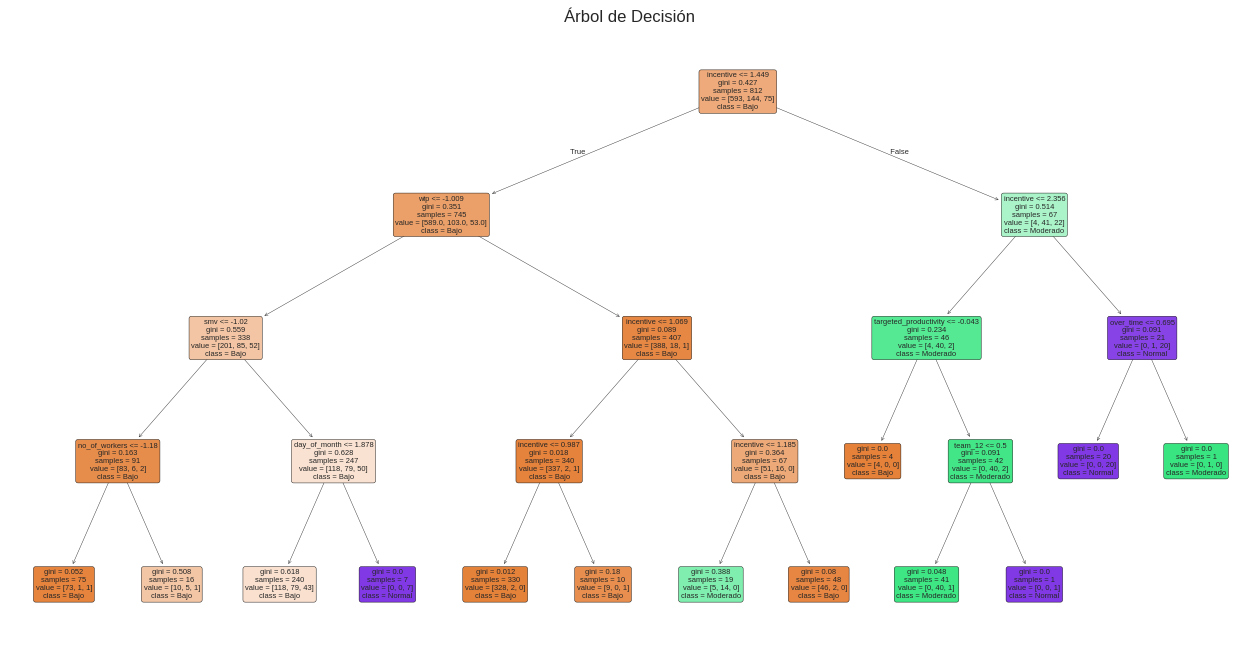

In [687]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(c) for c in tree.classes_], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()

## Solución 2: KNN (con Balanceo)

In [695]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_bal, y_bal)

# Predecir y evaluar
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.667621776504298


## Solución 3: Máquina de Vectores de Soporte (SVM) (con Balanceo)

In [689]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for i in range(1, 11):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        svm = SVC(kernel=kernel, C=i, random_state=42)
        svm.fit(X_bal, y_bal)
        y_pred = svm.predict(X_test)
        print(f"Exactitud con kernel={kernel} y C={i}: {accuracy_score(y_test, y_pred)}")

Exactitud con kernel=linear y C=1: 0.6074498567335244
Exactitud con kernel=poly y C=1: 0.667621776504298
Exactitud con kernel=rbf y C=1: 0.6991404011461319
Exactitud con kernel=sigmoid y C=1: 0.3868194842406877
Exactitud con kernel=linear y C=2: 0.6160458452722063
Exactitud con kernel=poly y C=2: 0.7306590257879656
Exactitud con kernel=rbf y C=2: 0.7593123209169055
Exactitud con kernel=sigmoid y C=2: 0.41260744985673353
Exactitud con kernel=linear y C=3: 0.6217765042979942
Exactitud con kernel=poly y C=3: 0.7449856733524355
Exactitud con kernel=rbf y C=3: 0.7822349570200573
Exactitud con kernel=sigmoid y C=3: 0.4183381088825215
Exactitud con kernel=linear y C=4: 0.6217765042979942
Exactitud con kernel=poly y C=4: 0.7679083094555874
Exactitud con kernel=rbf y C=4: 0.7822349570200573
Exactitud con kernel=sigmoid y C=4: 0.4269340974212034
Exactitud con kernel=linear y C=5: 0.6217765042979942
Exactitud con kernel=poly y C=5: 0.7593123209169055
Exactitud con kernel=rbf y C=5: 0.782234957020

Exactitud con kernel=rbf y C=10: 0.7765042979942693

## Solución 4: Regresion logistica (con Balanceo)

In [690]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_bal, y_bal)

# Predecir y evaluar
y_pred = logreg.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.6017191977077364


/home/noah/Projects/PUCP_machine-learning_garment-productivity/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Optimizar Hiperparámetros (GridSearchCV)

In [691]:
"""
from sklearn.model_selection import GridSearchCV

# Definir parámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Búsqueda en grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrica para multiclase
    cv=5,
    n_jobs=-1
)

# Ejecutar búsqueda en datos balanceados
grid_search.fit(X_bal, y_bal)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


### Evaluación en Conjunto de Prueba No Balanceado

In [692]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en datos de prueba originales (no balanceados)
y_pred = best_model.predict(X_test)

print("Precisión (Ternaria):", accuracy_score(y_test, y_pred))
# Métricas detalladas
print("Reporte de Clasificación (Datos Reales):\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Precisión (Ternaria): 0.828080229226361
Reporte de Clasificación (Datos Reales):
               precision    recall  f1-score   support

        Bajo       0.92      0.91      0.92       255
    Moderado       0.61      0.58      0.60        62
      Normal       0.53      0.62      0.57        32

    accuracy                           0.83       349
   macro avg       0.69      0.71      0.70       349
weighted avg       0.83      0.83      0.83       349

Matriz de Confusión:
 [[233  13   9]
 [ 17  36   9]
 [  2  10  20]]


### Validación Cruzada y Evaluación

In [693]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(best_model, X_bal, y_bal, cv=5, scoring='f1_weighted')
print("F1-score promedio:", np.mean(scores))


# Evaluar en datos de prueba
#X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
#y_pred = best_model.predict(X_test)
#print("Precisión (Multiclase):", accuracy_score(y_test, y_pred))

F1-score promedio: 0.9448739956946242
